In [1]:
#GRU(Gated Recurrent Unit)を使う
import numpy as np
import pandas as pd
import tflearn
import matplotlib.pyplot as plt

#読み込むファイルを変更するだけで良い
#繋げたチェーンに対して行う際にはdummy_joint_chain指定
dataframe = pd.read_csv('chain'.csv',
        usecols=[1],
        engine='python',
        skipfooter=0)
dataset = dataframe.values
dataset = dataset.astype('float32')

dataset -= np.min(np.abs(dataset))
dataset /= np.max(np.abs(dataset))


def create_dataset(dataset, steps_of_history, steps_in_future):
    X, Y = [], []
    for i in range(0, len(dataset)-steps_of_history, steps_in_future):
        X.append(dataset[i:i+steps_of_history])
        Y.append(dataset[i + steps_of_history])
    X = np.reshape(np.array(X), [-1, steps_of_history, 1])
    Y = np.reshape(np.array(Y), [-1, 1])
    return X, Y

def split_data(x, y, test_size=0.1):
    pos = round(len(x) * (1 - test_size))
    trainX, trainY = x[:pos], y[:pos]
    testX, testY   = x[pos:], y[pos:]
    return trainX, trainY, testX, testY

steps_of_history = 1
steps_in_future = 1

X, Y = create_dataset(dataset, steps_of_history, steps_in_future)
trainX, trainY, testX, testY = split_data(X, Y, 0.33)

from tensorflow import reset_default_graph
reset_default_graph()

net = tflearn.input_data(shape=[None, steps_of_history, 1])

#変更点
net = tflearn.gru(net, n_units=6)

net = tflearn.fully_connected(net, 1, activation='linear')
net = tflearn.regression(net, optimizer='adam', learning_rate=0.001,
        loss='mean_square')

model = tflearn.DNN(net, tensorboard_verbose=0)
model.fit(trainX, trainY, validation_set=0.1, batch_size=1, n_epoch=150)

Training Step: 1199  | total loss: 0.00308 | time: 0.023s
| Adam | epoch: 150 | loss: 0.00308 -- iter: 7/8
Training Step: 1200  | total loss: 0.00308 | time: 1.034s
| Adam | epoch: 150 | loss: 0.00308 | val_loss: 0.00065 -- iter: 8/8
--


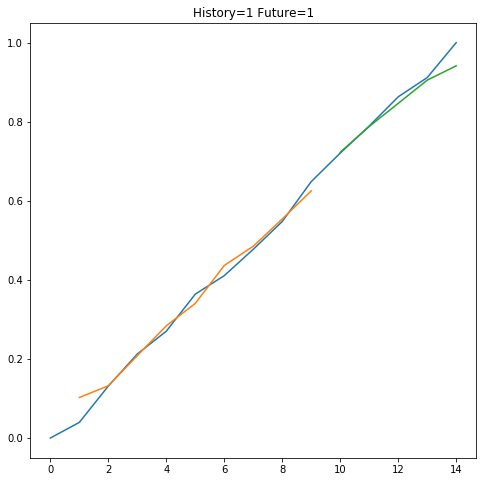

In [8]:
#結果を可視化する
train_predict = model.predict(trainX)
test_predict = model.predict(testX)

train_predict_plot = np.empty_like(dataset)
train_predict_plot[:, :] = np.nan
train_predict_plot[steps_of_history:len(train_predict)+steps_of_history, :] = \
        train_predict

test_predict_plot = np.empty_like(dataset)
test_predict_plot[:, :] = np.nan
test_predict_plot[len(train_predict)+steps_of_history:len(dataset), :] = \
        test_predict

plt.figure(figsize=(8, 8))
plt.title('History={} Future={}'.format(steps_of_history, steps_in_future))
plt.plot(dataset)
plt.plot(train_predict_plot)
plt.plot(test_predict_plot)
plt.savefig('chain_gru.png')

In [9]:
#LSTMネットワークを構築しよう

import numpy as np
import pandas as pd
import tflearn
import matplotlib.pyplot as plt

dataframe = pd.read_csv('chain.csv',
        usecols=[1],
        engine='python',
        skipfooter= 0)
dataset = dataframe.values
dataset = dataset.astype('float32')

dataset -= np.min(np.abs(dataset))
dataset /= np.max(np.abs(dataset))

def create_dataset(dataset, steps_of_history, steps_in_future):
    X, Y = [], []
    for i in range(0, len(dataset)-steps_of_history, steps_in_future):
        X.append(dataset[i:i+steps_of_history])
        Y.append(dataset[i + steps_of_history])
    X = np.reshape(np.array(X), [-1, steps_of_history, 1])
    Y = np.reshape(np.array(Y), [-1, 1])
    return X, Y

def split_data(x, y, test_size=0.1):
    pos = round(len(x) * (1 - test_size))
    trainX, trainY = x[:pos], y[:pos]
    testX, testY   = x[pos:], y[pos:]
    return trainX, trainY, testX, testY

steps_of_history = 1
steps_in_future = 1

X, Y = create_dataset(dataset, steps_of_history, steps_in_future)
trainX, trainY, testX, testY = split_data(X, Y, 0.33)

from tensorflow import reset_default_graph
reset_default_graph()

net = tflearn.input_data(shape=[None, steps_of_history, 1])
net = tflearn.lstm(net, n_units=6)
net = tflearn.fully_connected(net, 1, activation='linear')
net = tflearn.regression(net, optimizer='adam', learning_rate=0.001,
        loss='mean_square')

model = tflearn.DNN(net, tensorboard_verbose=0)
model.fit(trainX, trainY, validation_set=0.1, batch_size=1, n_epoch=150)

Training Step: 1199  | total loss: 0.00190 | time: 0.027s
| Adam | epoch: 150 | loss: 0.00190 -- iter: 7/8
Training Step: 1200  | total loss: 0.00190 | time: 1.036s
| Adam | epoch: 150 | loss: 0.00190 | val_loss: 0.00037 -- iter: 8/8
--


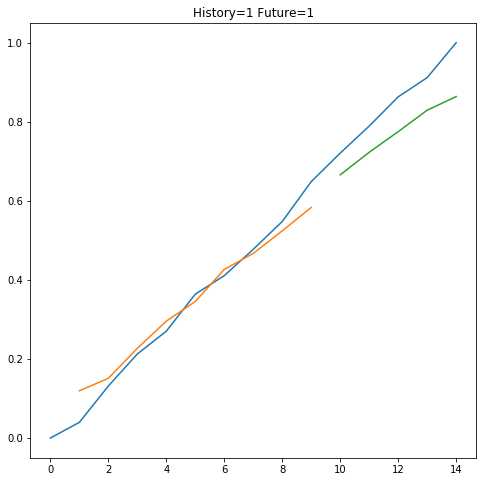

In [3]:
#結果を可視化する
train_predict = model.predict(trainX)
test_predict = model.predict(testX)

train_predict_plot = np.empty_like(dataset)
train_predict_plot[:, :] = np.nan
train_predict_plot[steps_of_history:len(train_predict)+steps_of_history, :] = \
        train_predict

test_predict_plot = np.empty_like(dataset)
test_predict_plot[:, :] = np.nan
test_predict_plot[len(train_predict)+steps_of_history:len(dataset), :] = \
        test_predict

plt.figure(figsize=(8, 8))
plt.title('History={} Future={}'.format(steps_of_history, steps_in_future))
plt.plot(dataset)
plt.plot(train_predict_plot)
plt.plot(test_predict_plot)
plt.savefig('chain_lstm.png')

In [7]:
#GRU(Gated Recurrent Unit)を使う
import numpy as np
import pandas as pd
import tflearn
import matplotlib.pyplot as plt

#読み込むファイルを変更するだけで良い
#繋げたチェーンに対して行う際にはdummy_joint_chain指定
dataframe = pd.read_csv('dummy_joint_chain.csv',
        usecols=[1],
        engine='python',
        skipfooter=0)
dataset = dataframe.values
dataset = dataset.astype('float32')

dataset -= np.min(np.abs(dataset))
dataset /= np.max(np.abs(dataset))


def create_dataset(dataset, steps_of_history, steps_in_future):
    X, Y = [], []
    for i in range(0, len(dataset)-steps_of_history, steps_in_future):
        X.append(dataset[i:i+steps_of_history])
        Y.append(dataset[i + steps_of_history])
    X = np.reshape(np.array(X), [-1, steps_of_history, 1])
    Y = np.reshape(np.array(Y), [-1, 1])
    return X, Y

def split_data(x, y, test_size=0.1):
    pos = round(len(x) * (1 - test_size))
    trainX, trainY = x[:pos], y[:pos]
    testX, testY   = x[pos:], y[pos:]
    return trainX, trainY, testX, testY

steps_of_history = 1
steps_in_future = 1

X, Y = create_dataset(dataset, steps_of_history, steps_in_future)
trainX, trainY, testX, testY = split_data(X, Y, 0.33)

from tensorflow import reset_default_graph
reset_default_graph()

net = tflearn.input_data(shape=[None, steps_of_history, 1])

#変更点
net = tflearn.gru(net, n_units=6)
#二層にしたい時使う
#net = tflearn.gru(net, n_units=6, return_seq=True)

net = tflearn.fully_connected(net, 1, activation='linear')
net = tflearn.regression(net, optimizer='adam', learning_rate=0.001,
        loss='mean_square')

model = tflearn.DNN(net, tensorboard_verbose=0)
model.fit(trainX, trainY, validation_set=0.1, batch_size=1, n_epoch=150)

Training Step: 724  | total loss: 0.01187 | time: 0.665s
| Adam | epoch: 002 | loss: 0.01187 -- iter: 274/450


KeyboardInterrupt: 

In [ ]:
#結果を可視化する
train_predict = model.predict(trainX)
test_predict = model.predict(testX)

train_predict_plot = np.empty_like(dataset)
train_predict_plot[:, :] = np.nan
train_predict_plot[steps_of_history:len(train_predict)+steps_of_history, :] = \
        train_predict

test_predict_plot = np.empty_like(dataset)
test_predict_plot[:, :] = np.nan
test_predict_plot[len(train_predict)+steps_of_history:len(dataset), :] = \
        test_predict

plt.figure(figsize=(8, 8))
plt.title('History={} Future={}'.format(steps_of_history, steps_in_future))
plt.plot(dataset)
plt.plot(train_predict_plot)
plt.plot(test_predict_plot)
plt.savefig('all_chain_lstm.png')

In [ ]:
#LSTMネットワークを構築しよう

import numpy as np
import pandas as pd
import tflearn
import matplotlib.pyplot as plt

dataframe = pd.read_csv('chain.csv',
        usecols=[1],
        engine='python',
        skipfooter= 0)
dataset = dataframe.values
dataset = dataset.astype('float32')

dataset -= np.min(np.abs(dataset))
dataset /= np.max(np.abs(dataset))

def create_dataset(dataset, steps_of_history, steps_in_future):
    X, Y = [], []
    for i in range(0, len(dataset)-steps_of_history, steps_in_future):
        X.append(dataset[i:i+steps_of_history])
        Y.append(dataset[i + steps_of_history])
    X = np.reshape(np.array(X), [-1, steps_of_history, 1])
    Y = np.reshape(np.array(Y), [-1, 1])
    return X, Y

def split_data(x, y, test_size=0.1):
    pos = round(len(x) * (1 - test_size))
    trainX, trainY = x[:pos], y[:pos]
    testX, testY   = x[pos:], y[pos:]
    return trainX, trainY, testX, testY

steps_of_history = 1
steps_in_future = 1

X, Y = create_dataset(dataset, steps_of_history, steps_in_future)
trainX, trainY, testX, testY = split_data(X, Y, 0.33)

from tensorflow import reset_default_graph
reset_default_graph()

net = tflearn.input_data(shape=[None, steps_of_history, 1])
net = tflearn.lstm(net, n_units=6)
net = tflearn.fully_connected(net, 1, activation='linear')
net = tflearn.regression(net, optimizer='adam', learning_rate=0.001,
        loss='mean_square')

model = tflearn.DNN(net, tensorboard_verbose=0)
model.fit(trainX, trainY, validation_set=0.1, batch_size=1, n_epoch=150)

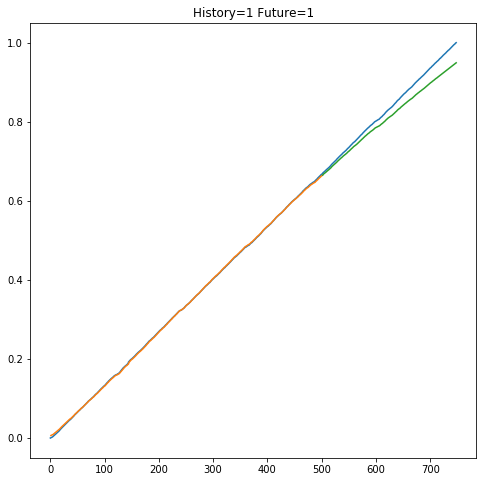

In [6]:
#結果を可視化する
train_predict = model.predict(trainX)
test_predict = model.predict(testX)

train_predict_plot = np.empty_like(dataset)
train_predict_plot[:, :] = np.nan
train_predict_plot[steps_of_history:len(train_predict)+steps_of_history, :] = \
        train_predict

test_predict_plot = np.empty_like(dataset)
test_predict_plot[:, :] = np.nan
test_predict_plot[len(train_predict)+steps_of_history:len(dataset), :] = \
        test_predict

plt.figure(figsize=(8, 8))
plt.title('History={} Future={}'.format(steps_of_history, steps_in_future))
plt.plot(dataset)
plt.plot(train_predict_plot)
plt.plot(test_predict_plot)
plt.savefig('all_chain_lstm.png')